<a href="https://colab.research.google.com/github/codewithsreenivas/HousePricePridiction/blob/main/HousePricePrediction_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data

In [7]:
data = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')

In [8]:
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [11]:
obj = (data.dtypes == 'object')
print(obj)
print('**********')
print(obj[obj])
print('**********')
print(obj[obj].index)
print('**********')
print(len(obj[obj].index))

Id              False
MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
**********
MSZoning       True
LotConfig      True
BldgType       True
Exterior1st    True
dtype: bool
**********
Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
**********
4


In [12]:
int_ = (data.dtypes == 'int64')
print(int_)
print('**********')
print(int_[int_])
print('**********')
print(int_[int_].index)
print('**********')
print(len(int_[int_].index))

Id               True
MSSubClass       True
MSZoning        False
LotArea          True
LotConfig       False
BldgType        False
OverallCond      True
YearBuilt        True
YearRemodAdd     True
Exterior1st     False
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
**********
Id              True
MSSubClass      True
LotArea         True
OverallCond     True
YearBuilt       True
YearRemodAdd    True
dtype: bool
**********
Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')
**********
6


In [13]:
float_ = (data.dtypes == 'float64')
print(float_)
print('**********')
print(float_[float_])
print('**********')
print(float_[float_].index)
print('**********')
print(len(float_[float_].index))

Id              False
MSSubClass      False
MSZoning        False
LotArea         False
LotConfig       False
BldgType        False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st     False
BsmtFinSF2       True
TotalBsmtSF      True
SalePrice        True
dtype: bool
**********
BsmtFinSF2     True
TotalBsmtSF    True
SalePrice      True
dtype: bool
**********
Index(['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'], dtype='object')
**********
3


In [14]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [20]:
data.drop('Id', inplace = True, axis = 1)

In [21]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [23]:
data['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [26]:
data['SalePrice'].isnull().sum()

1459

In [27]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [30]:
data['SalePrice']

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: SalePrice, Length: 2919, dtype: float64

In [31]:
data['SalePrice'].isnull().sum()

0

In [32]:
data.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [33]:
data.dropna(inplace = True)

In [34]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
# EDA - Exploratory Data Analysis

# Find the correlation of the data.

In [35]:
data.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,57.190182,10137.665980,5.566770,1971.391349,1984.314452,49.667353,1052.805012,180921.195890
std,42.538067,7832.598853,1.108977,30.258751,20.864950,169.338330,439.688510,56232.174632
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7476.000000,5.000000,1954.000000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9450.000000,5.000000,1973.000000,1993.000000,0.000000,990.000000,180921.195890
75%,70.000000,11553.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [36]:
data_corr = data.corr()

<ipython-input-36-09b271be5fbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


In [37]:
data_corr

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.202661,-0.066033,0.033428,0.042057,-0.072839,-0.222397,-0.059326
LotArea,-0.202661,1.000000,-0.025024,0.031226,0.027047,0.085927,0.262102,0.237990
OverallCond,-0.066033,-0.025024,1.000000,-0.375150,0.043586,0.040980,-0.180554,-0.055299
YearBuilt,0.033428,0.031226,-0.375150,1.000000,0.611755,-0.028329,0.407691,0.369442
YearRemodAdd,0.042057,0.027047,0.043586,0.611755,1.000000,-0.062818,0.294832,0.355167
BsmtFinSF2,-0.072839,0.085927,0.040980,-0.028329,-0.062818,1.000000,0.089027,-0.007672
TotalBsmtSF,-0.222397,0.262102,-0.180554,0.407691,0.294832,0.089027,1.000000,0.433343
SalePrice,-0.059326,0.237990,-0.055299,0.369442,0.355167,-0.007672,0.433343,1.000000


In [ ]:
# Data visualization:

<Axes: >

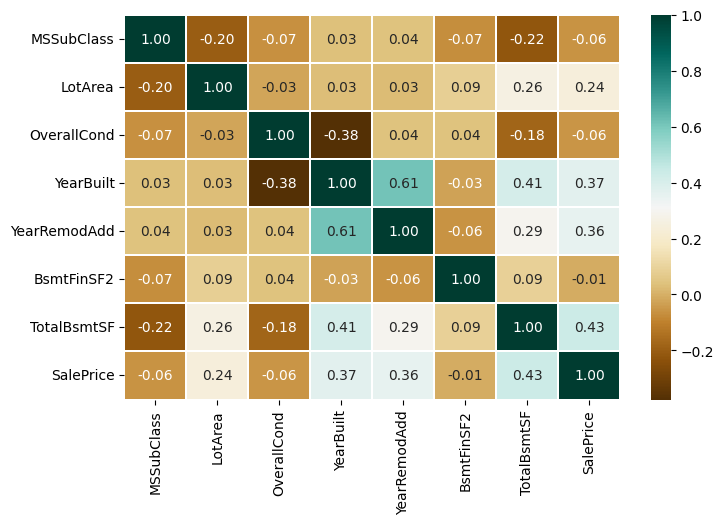

In [38]:
#1. Heatmap
plt.figure(figsize= (8,5))
sns.heatmap(data_corr, cmap = 'BrBG', annot = True, fmt = '.2f', linewidths= 0.2)

In [ ]:
# help(sns.heatmap)

In [ ]:
# To understand the categorical features, we will plot a barplot.

In [39]:
obj_col = list(obj[obj].index)

In [40]:
obj_col

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [41]:
unique_val = []
for o in obj_col:
    unique_val.append(data[o].unique().size)

In [42]:
unique_val

[5, 5, 5, 15]

In [43]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [44]:
data['MSZoning'].value_counts()

RL         2264
RM          459
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [45]:
data['LotConfig'].value_counts()

Inside     2128
Corner      511
CulDSac     176
FR2          85
FR3          13
Name: LotConfig, dtype: int64

In [46]:
data['BldgType'].value_counts()

1Fam      2419
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [49]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     449
HdBoard     442
Wd Sdng     409
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      43
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
ImStucc       1
CBlock        1
Name: Exterior1st, dtype: int64

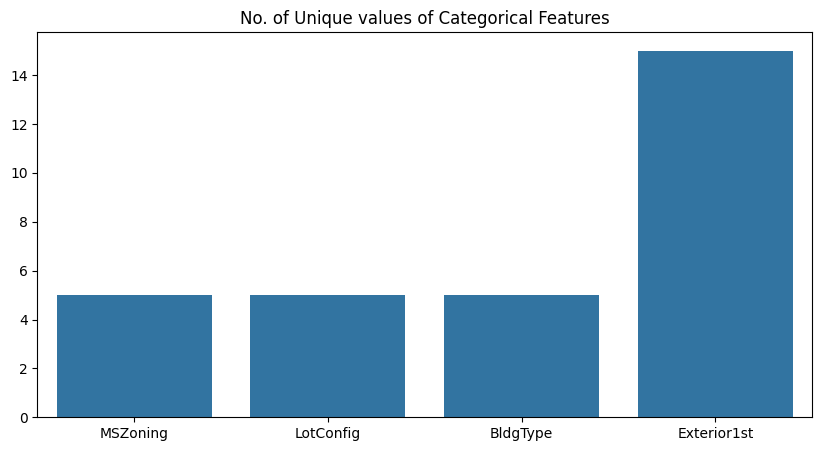

In [50]:
plt.figure(figsize = (10,5))
sns.barplot(x = obj_col, y = unique_val)
plt.title('No. of Unique values of Categorical Features')
# plt.xticks(rotation=45)
plt.show()

In [51]:
# help(plt.bar)

In [52]:
# Plot of each count separately with their counts

<ipython-input-53-16e5cece9d40>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 4, index)


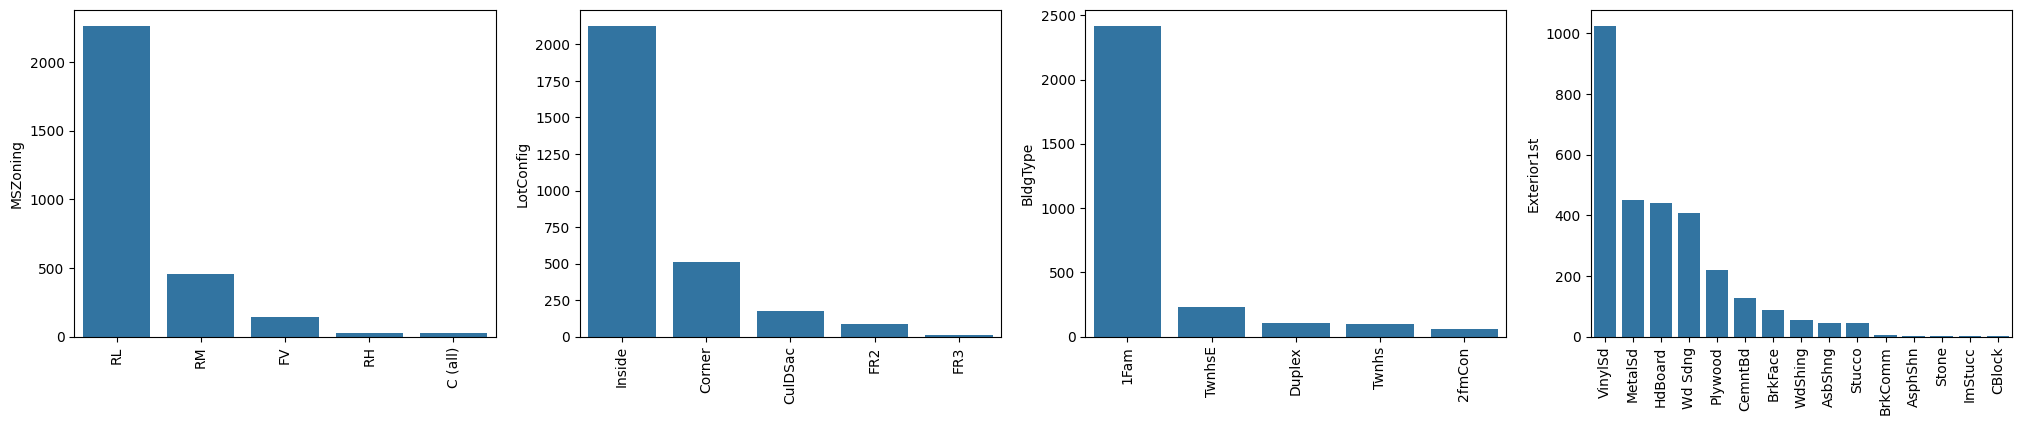

In [53]:
plt.figure(figsize = (25,50))
plt.title('Categorical features and their counts')
plt.xticks(rotation = 45)
index = 1

for col in obj_col:
    y = data[col].value_counts()
    plt.subplot(10, 4, index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y = y)
    index += 1

In [54]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [55]:
a = data.dtypes == 'object'
print(a)
print('************')
print(a[a])

MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
************
MSZoning       True
LotConfig      True
BldgType       True
Exterior1st    True
dtype: bool


In [56]:
obj_lst = list(a[a].index)

In [57]:
obj_lst

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [58]:
# preprocessing the data for ML

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
ohe = OneHotEncoder(sparse = False)

In [61]:
# help(OneHotEncoder)

In [62]:
ohe_col = pd.DataFrame(ohe.fit_transform(data[obj_lst]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [63]:
ohe_col

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
ohe_col.index = data.index

In [65]:
ohe_col.columns = ohe.get_feature_names_out()

In [66]:
ohe_col.columns

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [67]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [68]:
ohe_col

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
final_data = data.drop(obj_lst, axis = 1)

In [70]:
final_data

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.00000
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000
2,60,11250,5,2001,2002,0.0,920.0,223500.00000
3,70,9550,5,1915,1970,0.0,756.0,140000.00000
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589


In [71]:
ohe_col

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
final_data = pd.concat([final_data, ohe_col], axis = 1)

In [73]:
final_data

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
data = final_data
data

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# Splitting the data to train the data.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
data.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [78]:
X = data[['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing']]

y = data['SalePrice']

In [79]:
# help(train_test_split)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [81]:
# Using the supervised ML models to check the accuracy. Majorly there are 3 SML models for regression data, they are,
# 1. Linear regression
# 2. Random Forest
# 3. SVM (Support Vector Machine)
# Checking all the methods to find the model with the highest accuracy.

1. Linear Rigression

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

In [85]:
lr.fit(X_train, y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [86]:
ypred_lr = lr.predict(X_test)

In [87]:
# ypred

In [88]:
# Calculating the accuracy of the Linear Regression model using mean squared error (MSE):

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [90]:
# help(mean_squared_error)
mean_squared_error(y_test, ypred_lr)

1932598151.9445324

In [91]:
mean_absolute_percentage_error(y_test, ypred_lr)

0.17046456576596644

2. Random forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# help(RandomForestRegressor)

In [93]:
rfr = RandomForestRegressor()

In [94]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [95]:
ypred_rfr = rfr.predict(X_test)

In [96]:
mean_absolute_percentage_error(y_test, ypred_rfr)

0.16428777863740526

3. SVM - Support Vector Machine using SVR

In [97]:
from sklearn.svm import SVR

In [99]:
svr = SVR()

In [100]:
svr.fit(X_train, y_train)

SVR()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [101]:
ypred_svr = svr.predict(X_test)

In [102]:
mean_absolute_percentage_error(y_test, ypred_svr)

0.139459609467614

In [103]:
# So, by comparing the mean absolute percentage error values obtained from linear regression,
# random forest regressor and SVR from SVM, it is evident that the error score of SVR(SVM) is the least
# and hence using SVM for this regression problem is giving more accurate results and prediction as
# the model's accuracy is determined by the low error score of MAPE.